In [21]:
include("../lna.jl")
using DifferentialEquations, StatsBase, Plots, Distributions

## One mrna species

In [51]:
rn = @reaction_network begin
    ρ_r, 0 --> R
    δ_r, R --> 0
    ρ_m, 0 --> M
    δ_m, M --> 0
    σ_b, M + R --> MR
    δ_u, MR --> M + R
    ρ_p, MR --> MR + P
    δ_r, MR --> 0
    δ_r, P --> 0
end ρ_r δ_r ρ_m δ_m σ_b δ_u σ_u ρ_p

ps = [ 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1 ]

prob = LNAProblem(rn, [0,0,0,0], ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

4×4 Matrix{Float64}:
  3.40394   -2.25494   -0.137453   0.110009
 -2.25494    3.40394   -0.137453   0.110009
 -0.137453  -0.137453   6.87097    3.25675
  0.110009   0.110009   3.25675   11.939

In [52]:
prob = DiscreteProblem(rn, [1, 1, 8, 8], (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Vector{Float64}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Vector{Vector{Int64}}:
 [1, 1, 8, 8]
 [2, 3, 9, 8]
 [0, 4, 8, 6]
 [0, 2, 6, 7]
 [10, 0, 8, 10]
 [0, 4, 11, 7]
 [0, 2, 8, 12]
 [9, 0, 4, 4]
 [3, 2, 6, 5]
 [2, 2, 4, 7]
 [1, 9, 4, 5]
 [1, 3, 12, 6]
 [10, 0, 10, 8]
 ⋮
 [2, 0, 6, 6]
 [1, 4, 4, 6]
 [1, 5, 6, 4]
 [0, 1, 10, 14]
 [3, 0, 7, 3]
 [0, 2, 8, 7]
 [1, 5, 9, 5]
 [1, 4, 7, 4]
 [0, 6, 6, 5]
 [3, 0, 13, 9]
 [1, 2, 9, 13]
 [3, 0, 6, 11]

In [53]:
mean(sol.u) - [1.3177446889773325, 1.31774468897734, 8.682255311022661, 8.682255311022661]

4-element Vector{Float64}:
  0.5496179637696126
  0.560277750573869
 -0.5614177277743266
 -0.552957896970943

In [54]:
(StatsBase.cov(sol.u) - lnacovs)

4×4 Matrix{Float64}:
  0.670112   0.366458  -0.319139   -0.177799
  0.366458   0.693206  -0.321287   -0.185717
 -0.319139  -0.321287  -0.0473333   0.0302058
 -0.177799  -0.185717   0.0302058  -0.598863

## Two mrna species

In [55]:
rn = @reaction_network begin
    ρ_r, 0 --> R
    δ_r, R --> 0
    ρ_m1, 0 --> M1
    δ_m1, M1 --> 0
    σ_b1, M1 + R --> MR1
    δ_u1, MR1 --> M1 + R
    ρ_p1, MR1 --> MR1 + P
    ρ_m2, 0 --> M2
    δ_m2, M2 --> 0
    σ_b2, M2 + R --> MR2
    δ_u2, MR2 --> M2 + R
    ρ_p2, MR2 --> MR2 + P
    δ_r, MR1 --> 0
    δ_r, MR2 --> 0
    δ_r, P --> 0
end ρ_r δ_r ρ_m1 δ_m1 σ_b1 δ_u1 σ_u1 ρ_p1 ρ_m2 δ_m2 σ_b2 δ_u2 σ_u2 ρ_p2

ps = [ 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1, 1, 0.1 ]

prob = LNAProblem(rn, [0,0,0,0,0,0], ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

6×6 Matrix{Float64}:
  0.198997   -0.15389   0.0408867   0.0875771  -0.15389   0.0408867
 -0.15389     7.39258  -1.12692    -1.10357     2.29636  -1.12692
  0.0408867  -1.12692   4.86125     2.38602    -1.12692  -0.042524
  0.0875771  -1.10357   2.38602    14.5796     -1.10357   2.38602
 -0.15389     2.29636  -1.12692    -1.10357     7.39258  -1.12692
  0.0408867  -1.12692  -0.042524    2.38602    -1.12692   4.86125

In [56]:
prob = DiscreteProblem(rn, [1, 1, 8, 8, 8, 8], (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 50001-element Vector{Float64}:
    0.0
  100.0
  200.0
  300.0
  400.0
  500.0
  600.0
  700.0
  800.0
  900.0
 1000.0
 1100.0
 1200.0
    ⋮
    4.9989e6
    4.999e6
    4.9991e6
    4.9992e6
    4.9993e6
    4.9994e6
    4.9995e6
    4.9996e6
    4.9997e6
    4.9998e6
    4.9999e6
    5.0e6
u: 50001-element Vector{Vector{Int64}}:
 [1, 1, 8, 8, 8, 8]
 [0, 4, 10, 14, 8, 3]
 [0, 8, 2, 7, 6, 6]
 [0, 13, 4, 12, 3, 3]
 [0, 8, 4, 13, 4, 6]
 [1, 6, 7, 13, 2, 7]
 [0, 7, 4, 8, 9, 3]
 [2, 7, 1, 11, 4, 6]
 [1, 5, 3, 8, 4, 4]
 [0, 7, 4, 6, 4, 2]
 [0, 10, 2, 7, 3, 3]
 [0, 9, 5, 12, 6, 5]
 [1, 4, 6, 14, 3, 8]
 ⋮
 [0, 2, 2, 10, 5, 6]
 [2, 3, 5, 4, 4, 3]
 [1, 0, 5, 8, 5, 6]
 [1, 3, 6, 15, 1, 9]
 [1, 7, 4, 13, 7, 5]
 [1, 4, 7, 7, 2, 7]
 [0, 4, 8, 16, 5, 5]
 [0, 8, 12, 18, 1, 6]
 [0, 5, 4, 4, 6, 0]
 [0, 7, 4, 5, 7, 4]
 [0, 1, 9, 15, 6, 7]
 [0, 4, 5, 10, 2, 4]

In [57]:
mean(sol.u) - lnameans

6-element Vector{Float64}:
  0.050007701937285376
  0.03213370837149476
 -0.03163371837129425
 -0.029328115529013488
  0.020993931167038404
 -0.04369347717611838

In [58]:
StatsBase.cov(sol.u) - lnacovs

6×6 Matrix{Float64}:
  0.0780775  -0.0926518   0.0254936   0.0377746  -0.0956708   0.0241776
 -0.0926518  -0.0755007   0.0796103   0.0263604  -0.122727    0.0780583
  0.0254936   0.0796103  -0.0937401  -0.0054351   0.0228459  -0.0359658
  0.0377746   0.0263604  -0.0054351  -0.0359557   0.0214698  -0.0502897
 -0.0956708  -0.122727    0.0228459   0.0214698  -0.121265    0.0886796
  0.0241776   0.0780583  -0.0359658  -0.0502897   0.0886796  -0.0366695

# Arbitrary number of mRNA

In [2]:
function reaction(n)
    "
    ρ_m$(n), 0 --> M$(n)
    δ_m$(n), M$(n) --> 0
    σ_b$(n), M$(n) + R --> MR$(n)
    δ_u$(n), MR$(n) --> M$(n) + R
    ρ_p$(n), MR$(n) --> M$(n) + P$(n) + R
    δ_r, MR$(n) --> 0
    δ_r, P$(n) --> 0
    "
end

function endstring(n)
    cumulative_string = "end ρ_r δ_r "
    for i in 1:n
        cumulative_string = string(cumulative_string, "ρ_m$(i) δ_m$(i) σ_b$(i) δ_u$(i) σ_u$(i) ρ_p$(i) ")
    end
    cumulative_string
end

function generate_rn(n)
    rnstring = "rn = @reaction_network begin
        ρ_r, 0 --> R
        δ_r, R --> 0
    "
    for i in 1:n
        rnstring = string(rnstring, reaction(i))
    end
    rnstring = string(rnstring, endstring(n))
    rnexpression = Base.Meta.parse(rnstring)
    eval(rnexpression)
end

function generate_propensities(n)
    rand(Float64, (6*n+2))
end

function relative_error(true_val, approx_val)
    map(abs, 1 .- approx_val./true_val)
end

relative_error (generic function with 1 method)

In [60]:
N = 11

rn = generate_rn(N)

ps = generate_propensities(N)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 500000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)

retcode: Default
Interpolation: Piecewise constant interpolation
t: 5001-element Vector{Float64}:
      0.0
    100.0
    200.0
    300.0
    400.0
    500.0
    600.0
    700.0
    800.0
    900.0
   1000.0
   1100.0
   1200.0
      ⋮
 498900.0
 499000.0
 499100.0
 499200.0
 499300.0
 499400.0
 499500.0
 499600.0
 499700.0
 499800.0
 499900.0
 500000.0
u: 5001-element Vector{Vector{Int64}}:
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 2, 1, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 2, 0, 0, 1, 0, 0, 0, 1, 0]
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  2, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 0  …  1, 0, 0, 0, 2, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 1, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 3, 0, 0, 2, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 

In [61]:
1 .- (lnameans ./ mean(sol.u))

34-element Vector{Float64}:
  0.04940002155462642
  0.005189852030343278
 -0.17914261409484555
  0.7549309080137608
 -0.005782910895759219
 -0.12374755542641602
 -0.2722875682738022
  0.003419810911994281
 -0.17768070328741326
 -0.04909141991886301
  0.016827146926284064
 -0.015672990687662924
 -0.1738094887899715
  ⋮
  0.02565146301840171
  0.015402830776573007
  0.06289867065184174
  0.015537414106091552
  0.04625566229252853
  0.09987005226441148
 -0.03607851555858499
  0.14685954472382956
  0.340800249048018
  0.007503808167758641
 -0.031006362040832736
  0.010706107297536627

In [62]:
relative_error(mean(sol.u), lnameans)

34-element Vector{Float64}:
 0.04940002155462642
 0.005189852030343278
 0.17914261409484555
 0.7549309080137608
 0.005782910895759219
 0.12374755542641602
 0.2722875682738022
 0.003419810911994281
 0.17768070328741326
 0.04909141991886301
 0.016827146926284064
 0.015672990687662924
 0.1738094887899715
 ⋮
 0.02565146301840171
 0.015402830776573007
 0.06289867065184174
 0.015537414106091552
 0.04625566229252853
 0.09987005226441148
 0.03607851555858499
 0.14685954472382956
 0.340800249048018
 0.007503808167758641
 0.031006362040832736
 0.010706107297536627

In [63]:
relative_error(StatsBase.cov(sol.u), lnacovs)

34×34 Matrix{Float64}:
  0.0269456   1.78398    0.714386  …  4.91374      0.749795   1.57873
  1.78398     0.0180805  1.17758      1.04471      0.88362    1.03133
  0.714386    1.17758    0.181964     1.62856      0.97812    0.912152
  0.934263    0.781303   0.997358     1.06462      0.991361   0.997001
  0.00681313  1.05777    0.496155     0.939146     0.516304   9.59246
  1.13988     1.10151    0.997623  …  0.787062     0.993355   0.291319
  0.165494    0.270008   0.926606     1.74643      0.595989   0.877772
  0.215097    1.74311    1.5335       1.61886      0.335366   0.558638
  1.00177     0.12446    6.64988      1.27681      1.216      0.463628
  0.475834    0.96078    0.90908      1.28274      0.672365   0.646963
  0.150695    1.01517    0.298156  …  0.950545     2.4582     1.11845
  3.1558      1.07172    0.992041     0.77052      0.95965    0.895703
  0.0302408   1.02332    0.943217     1.22397      0.168552   0.803751
  ⋮                                ⋱                      

In [64]:
[[1,2] [3,4]] ./[[1,2] [3,4]]

2×2 Matrix{Float64}:
 1.0  1.0
 1.0  1.0

### Testing without simulation

In [65]:
N = 10

rn = generate_rn(N)

ps = generate_propensities(N)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

31×31 Matrix{Float64}:
  0.509791     -0.00757186    0.00113275   …   0.000395429   0.00386983
 -0.00757186    0.267996     -0.000478346     -0.000118575  -0.00029398
  0.00113275   -0.000478346   0.0551649        2.2156e-5     0.000305216
  0.00603073    0.0128226     0.00260977       0.000109955   0.00023009
 -0.0499518     0.00447049   -0.0031257       -0.000770073  -0.00181779
  0.00151273   -0.00222779   -0.000388583  …   1.86787e-6    0.00155528
  0.0289024    -0.00213025    0.00216333       0.000511683   0.00100991
 -0.0701603     0.00699925   -0.00509348      -0.00125365   -0.00335621
  0.0057978    -0.00320703   -8.17345e-5       9.19713e-5    0.00198859
  0.0802574    -0.00609377    0.00609407       0.00144578    0.00295002
 -0.0135449     0.00129748   -0.000915975  …  -0.000226033  -0.000557485
  0.00195567   -0.000744607   6.65258e-5       3.97769e-5    0.00048239
  0.0179092    -0.00132958    0.00138967       0.000327389   0.000668282
  ⋮                                   

In [66]:
function solve_lna(N)
    rn = generate_rn(N)

    ps = generate_propensities(N)
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)
    [lnameans, lnacovs]
end

solve_lna (generic function with 1 method)

In [67]:
@time solve_lna(50)

 23.045107 seconds (349.62 M allocations: 12.271 GiB, 5.93% gc time, 3.52% compilation time)


2-element Vector{AbstractArray{Float64}}:
 [0.030506607379809526, 2.5890550508411856, 0.030676823513057876, 0.01806024569569266, 0.3177453794792285, 0.002646974510901194, 4.876106815920195e-5, 1.1730152083959935, 0.008204510080788792, 0.00808135075299459  …  0.0028630963555609915, 0.9137064606247034, 0.009364928734144745, 0.010002349832981703, 0.043087107784599184, 0.000735991276384259, 9.604115489338302e-5, 1.0306711233183588, 0.009310567362638833, 0.006368650890098212]
 [0.030522087219513938 -0.001028686720687122 … 3.4322095362662036e-6 0.00016673840882871154; -0.001028686720687122 2.594522469739967 … -0.0002871990788840158 -0.00034802099691245357; … ; 3.4322095362662036e-6 -0.0002871990788840158 … 0.009311139442551658 5.659641718114804e-5; 0.00016673840882871154 -0.00034802099691245357 … 5.659641718114804e-5 0.006407364193876395]

In [14]:
@time solve_lna(100)

LoadError: UndefVarError: LNAProblem not defined

In [15]:
@time solve_lna(150)

LoadError: UndefVarError: LNAProblem not defined

# Exploring a range of values...

Want to run the LNA and SSA for a range of parameter sets, firstly in the case where we have 10 genes and then look at expanding it. We want a histogram of relative error in the first protein copy number. Then a similar graph for its variance.

In [16]:
function get_relative_difference(N)
    N = 11

    rn = generate_rn(N)

    ps = generate_propensities(N)
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)

    initial_values = map(Int64, map(ceil, lnameans))

    prob = DiscreteProblem(rn, initial_values, (0, 500000.),  ps)
    jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

    sol = solve(jump_prob, SSAStepper(), saveat=100.0)
    relative_error(mean(sol.u), lnameans)
end

errors = zeros(100)
for i in 1:100
    errors[i] = get_relative_difference(10)[1]
end 

LoadError: UndefVarError: LNAProblem not defined

In [17]:
histogram(errors)

LoadError: UndefVarError: histogram not defined

# Finding a parameter set that works

We need to find a parameter set which works for a single gene then use that for a homogeneous set of 10 genes.

In [18]:
N = 1

rn = generate_rn(N)

ps = (100., .1, 10., .1, .2, .1, .5, .1)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
relative_error(mean(sol.u), lnameans)

LoadError: UndefVarError: LNAProblem not defined

In [19]:
relative_error(StatsBase.cov(sol.u), lnacovs)

LoadError: UndefVarError: StatsBase not defined

In [20]:
lnacovs

LoadError: UndefVarError: lnacovs not defined

In [21]:
StatsBase.cov(sol.u)

LoadError: UndefVarError: StatsBase not defined

Looks good so far...

In [22]:
N = 2

rn = generate_rn(N)

ps = (100., .1, 10., .1, .2, .1, .5, .1, 10., .1, .2, .1, .5, .1)
prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=100.0)
relative_error(mean(sol.u), lnameans)

LoadError: UndefVarError: LNAProblem not defined

# Homogeneous Case

In [3]:
function run_homogeneous_case(N, t_max=20000000.)
    rn = generate_rn(N)
    ps = [10., .1]
    
    for i in 1:N
        ps = vcat(ps, [1., .1, .2, .1, .5, .1])
    end
    
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)

    initial_values = map(Int64, map(ceil, lnameans))

    prob = DiscreteProblem(rn, initial_values, (0, Float64(t_max)),  ps)
    jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

    sol = solve(jump_prob, SSAStepper(), saveat=100.0)
    return [relative_error(mean(sol.u), lnameans), relative_error(StatsBase.cov(sol.u), lnacovs), sol]
end

run_homogeneous_case (generic function with 2 methods)

In [69]:
result = run_homogeneous_case(1, 100000000)

3-element Vector{AbstractArray}:
 [1.18777248971913e-5, 0.007231958920257298, 0.0003478176348190587, 0.0007335392021023956]
 [0.0005130860662504455 0.041449076815033514 0.00038385731615808716 0.005376316550179894; 0.041449076815033514 0.0064365731367139745 0.09099491381230873 8.742559755736679e-5; 0.00038385731615808716 0.09099491381230873 0.0015360737657551526 9.397807457423024e-5; 0.005376316550179894 8.742559755736679e-5 9.397807457423024e-5 0.0005956211564674962]
 ODESolution{Int64, 2, Vector{Vector{Int64}}, Nothing, Nothing, Vector{Float64}, Nothing, DiscreteProblem{Vector{Int64}, Tuple{Float64, Float64}, true, Vector{Float64}, DiscreteFunction{true, DiscreteFunction{true, SciMLBase.var"#160#161", Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED)}, Nothing, Vector{Symbol}, typeof(SciMLBase.DEFAULT_OBSERVED)}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, SSAStepper, SciMLBase.ConstantInterpolation{Vector{Float64}, Vector{Vector{Int64}}}, DiffEqBase.DEStats}([[

It would be nice to have a graph of protein 1 distribution and how it changes with the increase in gene number... Then to calculate the wasserstein or heileger distance between distributions.

After this do the same thing, but perturbe each gene by adding some noise.

In [25]:
plot(result[3])

LoadError: UndefVarError: result not defined

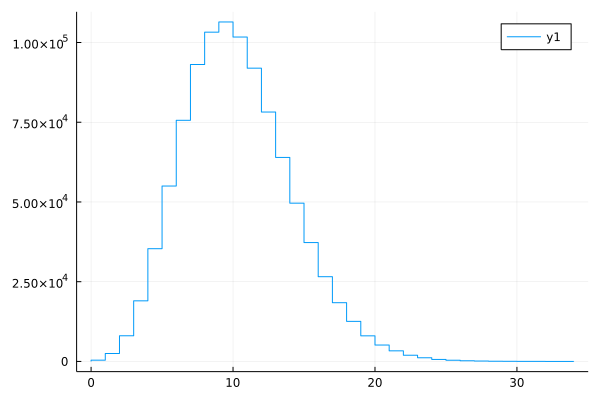

In [70]:
proteins = map(x -> x[4], result[3].u) 
histogram(proteins, nbins=maximum(proteins))

In [71]:
result2 = run_homogeneous_case(2, 100000000)

3-element Vector{AbstractArray}:
 [0.0001338528008381079, 0.010806077010162118, 0.00037873753920369957, 0.0001806194732100197, 0.009629782799359998, 0.0002165716838824494, 0.0002043451962300269]
 [0.002610549288921793 0.07546165420218487 … 0.003980008637541221 0.005507566646979156; 0.07546165420218487 0.009720136886014363 … 0.08432408091559074 0.18031237790110355; … ; 0.003980008637541221 0.08432408091559074 … 0.002783006131044541 0.0005117716979126108; 0.005507566646979156 0.18031237790110355 … 0.0005117716979126108 0.000435757872563336]
 ODESolution{Int64, 2, Vector{Vector{Int64}}, Nothing, Nothing, Vector{Float64}, Nothing, DiscreteProblem{Vector{Int64}, Tuple{Float64, Float64}, true, Vector{Float64}, DiscreteFunction{true, DiscreteFunction{true, SciMLBase.var"#160#161", Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED)}, Nothing, Vector{Symbol}, typeof(SciMLBase.DEFAULT_OBSERVED)}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, SSAStepper, SciMLBase.ConstantInte

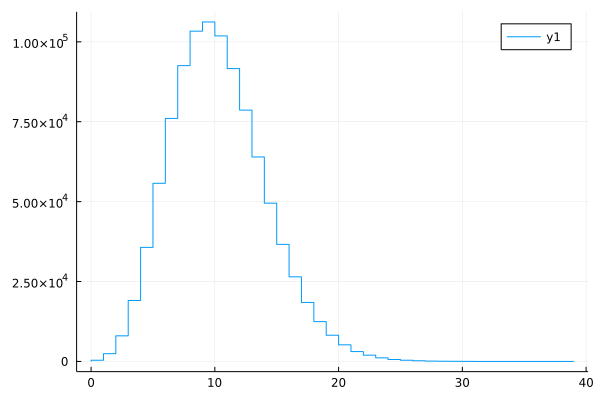

In [72]:
histogram(map(x -> x[4], result2[3].u), nbins=maximum(map(x -> x[4], result2[3].u)))

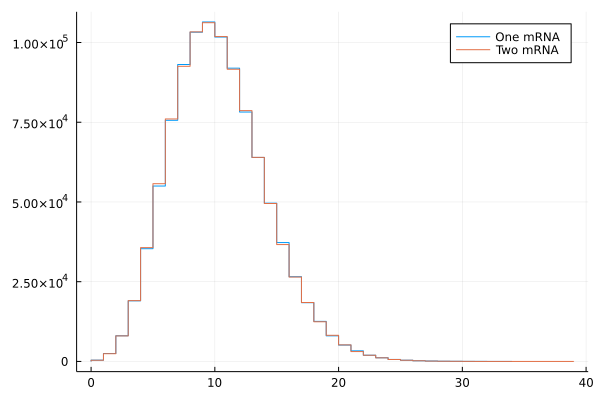

In [73]:
histogram(map(x -> x[4], result[3].u), fillalpha=0.5, label="One mRNA", nbins=maximum(map(x -> x[4], result[3].u)))
histogram!(map(x -> x[4], result2[3].u), fillalpha=0.5, label="Two mRNA", nbins=maximum(map(x -> x[4], result2[3].u)))

# Perturbed Homogeneous Case

In [4]:
function run_perturbed_homogeneous_case(N, max_pert, t_max=200000.)
    rn = generate_rn(N)
    ps = [10., .1]
    
    for i in 1:N
        ps = vcat(ps, [1., .1, .2, .1, .5, .1])
    end
    
    ps += rand(Float64, (length(ps)))*max_pert
    
    prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

    sol = solve(prob)

    lnameans = mean(sol)
    lnacovs = StatsBase.cov(sol)

    initial_values = map(Int64, map(ceil, lnameans))

    prob = DiscreteProblem(rn, initial_values, (0, Float64(t_max)),  ps)
    jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

    sol = solve(jump_prob, SSAStepper(), saveat=100.0)
    return [relative_error(mean(sol.u), lnameans), relative_error(StatsBase.cov(sol.u), lnacovs), sol]
end

run_perturbed_homogeneous_case (generic function with 2 methods)

In [75]:
result_pert = run_perturbed_homogeneous_case(1, 0.5, 2000000)

3-element Vector{AbstractArray}:
 [0.0012125536172088447, 0.025682915226877934, 0.00532461035547116, 0.008065717620660218]
 [0.015556459098899023 0.1868669507641838 0.13898813032860247 0.09030374280516429; 0.1868669507641838 0.03593513186652486 0.0889001577462365 0.003871153716588971; 0.13898813032860247 0.0889001577462365 0.0015805440747285182 0.04640365979193284; 0.09030374280516429 0.003871153716588971 0.04640365979193284 0.0028061484685915072]
 ODESolution{Int64, 2, Vector{Vector{Int64}}, Nothing, Nothing, Vector{Float64}, Nothing, DiscreteProblem{Vector{Int64}, Tuple{Float64, Float64}, true, Vector{Float64}, DiscreteFunction{true, DiscreteFunction{true, SciMLBase.var"#160#161", Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED)}, Nothing, Vector{Symbol}, typeof(SciMLBase.DEFAULT_OBSERVED)}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}}, SSAStepper, SciMLBase.ConstantInterpolation{Vector{Float64}, Vector{Vector{Int64}}}, DiffEqBase.DEStats}([[19, 1, 3, 1], [17, 1

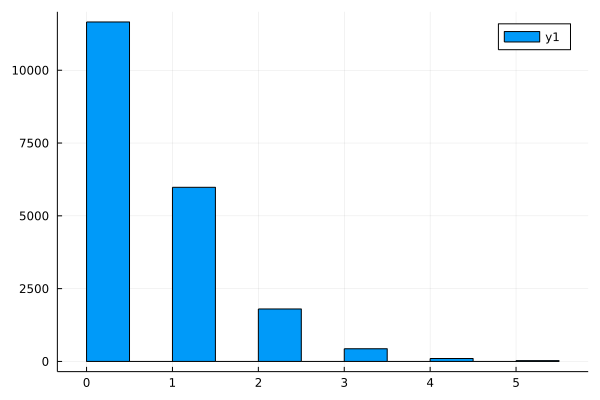

In [76]:
Plots.histogram(map(x -> x[4], result_pert[3].u), bins=18)

In [77]:
result_pert[1]

4-element Vector{Float64}:
 0.0012125536172088447
 0.025682915226877934
 0.00532461035547116
 0.008065717620660218

In [78]:
result_pert[2]

4×4 Matrix{Float64}:
 0.0155565  0.186867    0.138988    0.0903037
 0.186867   0.0359351   0.0889002   0.00387115
 0.138988   0.0889002   0.00158054  0.0464037
 0.0903037  0.00387115  0.0464037   0.00280615

In [5]:
function run_perturbed_case_many_time(N)
    results_mean = zeros(N)
    results_var = zeros(N)
    for i in 1:N
        result = run_perturbed_homogeneous_case(1, 0.5, 2000000)
        results_mean[i] = result[1][1]
        results_var[i] = result[2][1][1]
    end
    return [results_mean, results_var]
end

run_perturbed_case_many_time (generic function with 1 method)

In [6]:
result = run_perturbed_case_many_time(10)

2-element Vector{Vector{Float64}}:
 [0.002251011035249939, 0.0010476494339490827, 0.002649701153164763, 0.0003129909357759697, 0.0011733797503560295, 1.6290353833658955e-6, 0.0003046617264190754, 0.0005406596378212392, 0.0024773107805082795, 2.67766740762454e-5]
 [0.00683899552672107, 0.00478622116892613, 0.011233075729013775, 0.01649593532345106, 0.01367384185535414, 0.00991512989198906, 0.0023638726154806555, 0.005298159053404694, 0.003645362758868842, 0.005734783507607144]

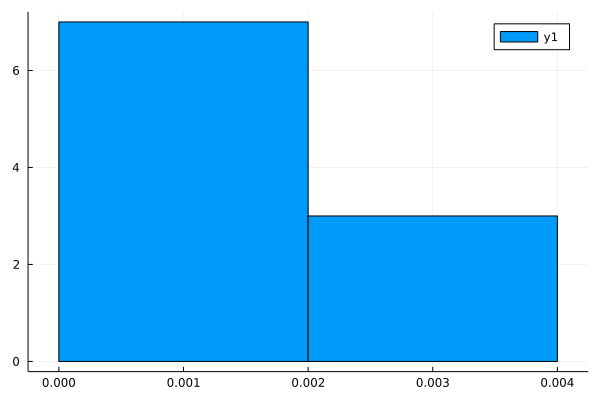

In [7]:
histogram(result[1])

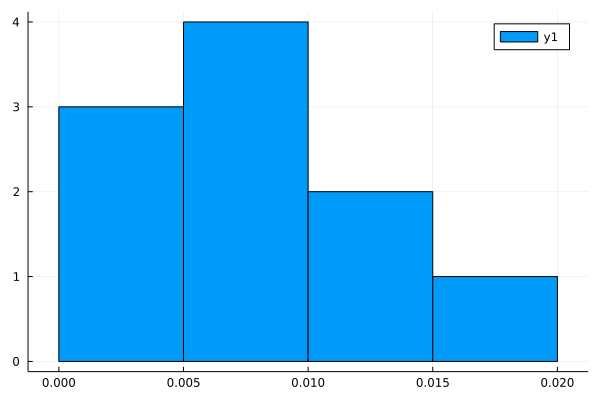

In [8]:
histogram(result[2])

In [83]:
result = run_perturbed_case_many_time(50)

2-element Vector{Vector{Float64}}:
 [0.0004988859481940278, 0.0012061728650850645, 0.0015521989817219861, 0.0008769348573707259, 0.001601901070151679, 0.0017786314534464776, 0.0012812848131436017, 0.0003822393270129787, 0.0010761394217525533, 0.0005636989456641039  …  0.0005089869523018375, 0.0036535115290667886, 5.496396957060945e-5, 0.0006518786093958617, 0.0017981440198557852, 0.0005885505868808982, 0.0002999615511840581, 0.0006431643360231831, 9.818756261426032e-5, 0.0003864728365499115]
 [0.008110015292341677, 0.0028159984926972026, 0.011404051032363083, 0.0011019099381555097, 0.005291585535606602, 0.006030576808671584, 0.010468487280699157, 0.011496209504688881, 0.009478705788038666, 0.010873686075405509  …  0.013438380918707415, 0.01761030318613166, 0.008395098537868684, 0.012677739669600618, 0.00855323060958213, 0.027020731837172907, 0.003992868596469079, 0.006097717600675567, 0.0022821994727790784, 0.012342095539902842]

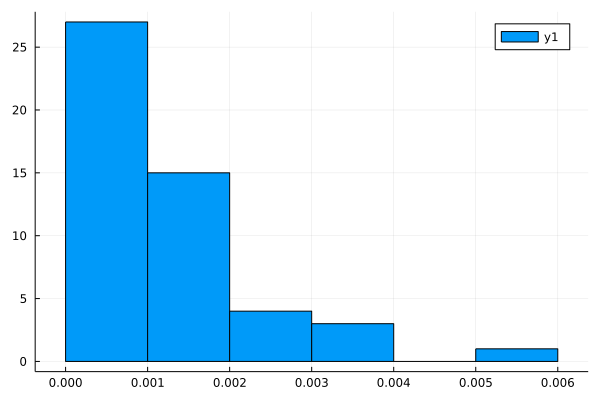

In [84]:
histogram(result[1])

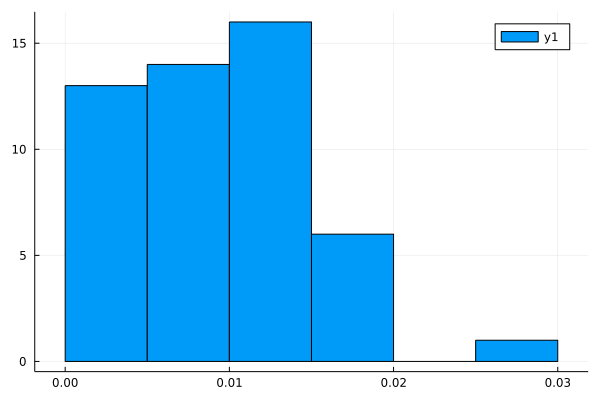

In [85]:
histogram(result[2])

In [86]:
result = run_perturbed_case_many_time(100)

2-element Vector{Vector{Float64}}:
 [0.0003832362141851231, 0.002157899671416885, 0.0017202904902450245, 0.001679583566822962, 0.002559170308767511, 0.0010329535098697606, 0.00034059244062778493, 0.0018365393083981107, 0.0013406846046944976, 0.0011051469313055895  …  0.0007015999311774657, 0.0009568812995569553, 0.0006213593328202593, 0.00042677967494708646, 0.00042777451596165417, 0.0010137211662406553, 4.878588039591847e-5, 0.0007391729926500279, 0.003907150356310396, 0.0006181924375481263]
 [0.0060272653851107805, 0.0012057811943595453, 0.002774553406479363, 0.015875303166452692, 0.015582423136694667, 0.01671221834590675, 0.003944692097240132, 0.004696781820117457, 0.01885250128926763, 0.0281390556196337  …  0.00831826628102128, 0.0008792970456911187, 0.00045135440526400394, 0.023246265183307635, 0.011804448889318309, 0.00210380352563988, 0.006333577609161756, 0.002973889811514363, 0.02026002869491561, 0.012028100018630417]

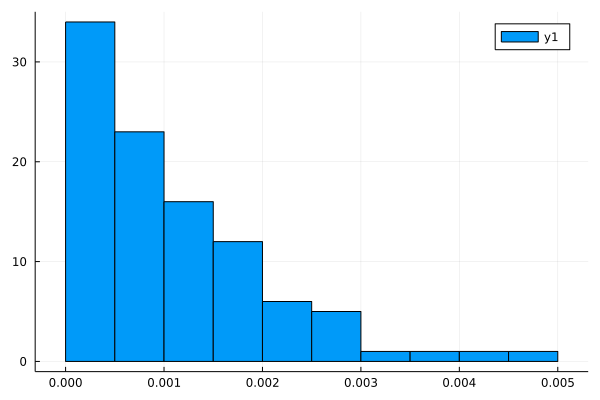

In [87]:
histogram(result[1])

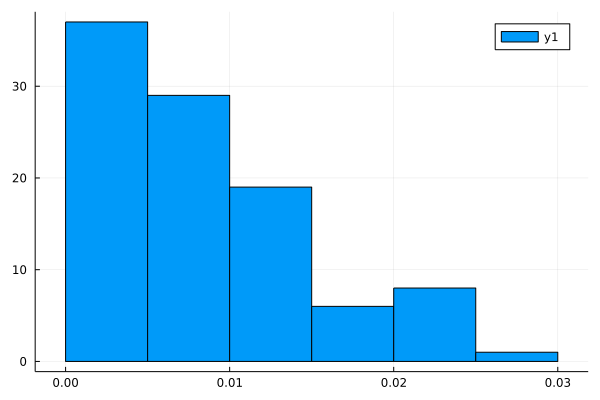

In [88]:
histogram(result[2])

In [89]:
result = run_perturbed_case_many_time(500)

2-element Vector{Vector{Float64}}:
 [0.0014270921925992885, 0.0007834505844964701, 0.003631775234326229, 0.001111281192408331, 0.001748082058366407, 0.0010258845610455758, 0.0010132306074300823, 0.0002995009487845035, 0.0003250106540102493, 0.0009422438667661126  …  7.97651660495724e-5, 0.001433527988995431, 0.0005700034973228352, 0.00028911373978157684, 0.00040960229807818216, 0.0005650102605044838, 0.0010187870613673766, 0.0001235325056284653, 0.0011240436798821696, 0.00220082002832922]
 [0.015762893453964977, 0.0069181013211307985, 0.005610433495211731, 0.01153403578136869, 0.008951931151454096, 0.007900837254010029, 0.017394651318054954, 0.012937448852029299, 0.001898700751906679, 0.009508948172712861  …  0.002865737085502751, 0.03238720175309284, 0.0029574647884700322, 0.004960607924747951, 0.0034782542526485827, 0.012871214861561286, 0.0002932465366969339, 0.0039047514594801047, 0.011047750937478229, 0.0008787098148976824]

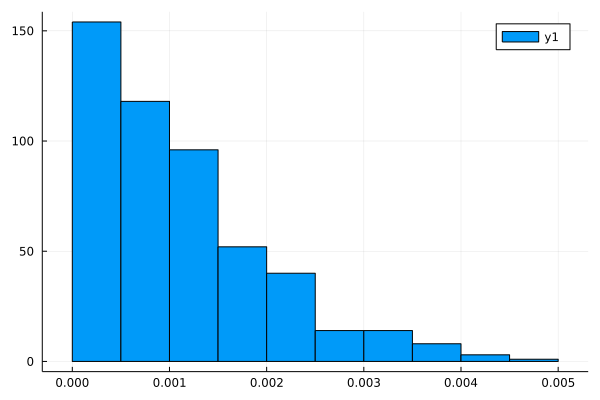

In [90]:
histogram(result[1])

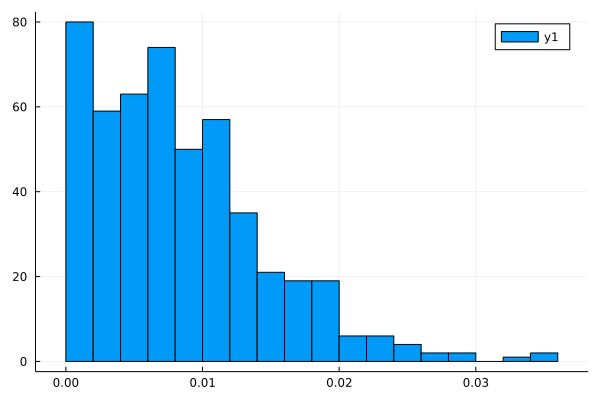

In [91]:
histogram(result[2])

In [9]:
result = run_perturbed_case_many_time(5000)

2-element Vector{Vector{Float64}}:
 [0.00043825575234057723, 0.0003571184435946506, 0.0016666762590578088, 0.0013847268484712405, 6.130125877756853e-5, 0.001730844852243063, 0.00024147523359263623, 0.0022782577475757293, 0.0005131517508480954, 0.0008380267345824421  …  0.0021652611855662585, 0.0020584499778355525, 0.000776633085069256, 0.001006658198959176, 0.0008401137105964462, 0.0003230073814928236, 0.003468558698305424, 0.0008145889455030142, 0.0010001596644046984, 0.0014064798709785276]
 [0.011718784565748708, 0.009184609276394085, 0.0042786369407783464, 0.004640188756663166, 0.003132536196469138, 0.006610280226044152, 0.018715306892716388, 0.00016764122480572574, 0.005678084062934685, 0.005733549843238928  …  0.0026576606522430435, 0.013115666717480323, 0.014838125643643618, 0.0004433263626054673, 0.006783261847905342, 0.004076174297944712, 0.0025192287144542025, 0.009175916363195813, 0.0014824333636195286, 0.003994259245404197]

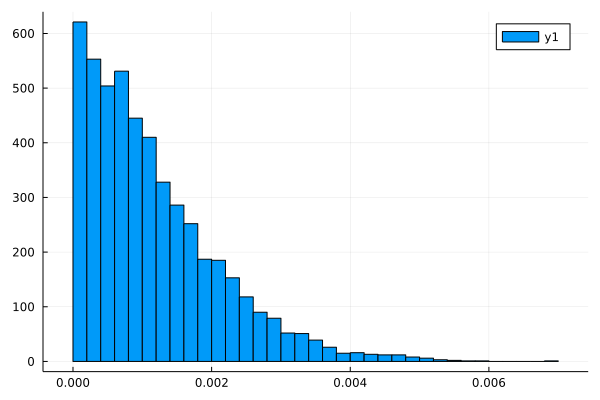

In [10]:
histogram(result[1])

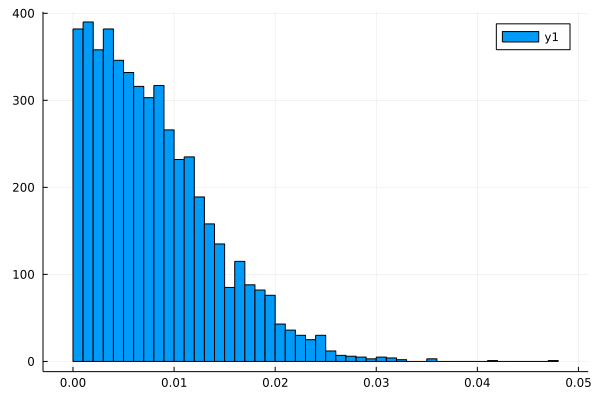

In [11]:
histogram(result[2])

## Worked Example

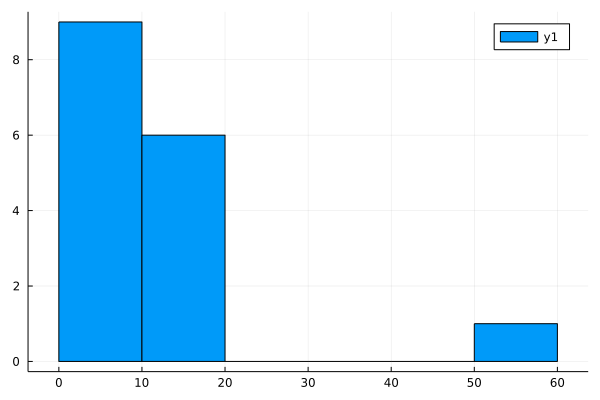

In [14]:
N = 5

rn = generate_rn(N)

ps = [10., .1]
    
for i in 1:N
    ps = vcat(ps, [1., .1, .2, .1, .5, .1])
end

prob = LNAProblem(rn, zeros(Int, 3*N+1), ps)

sol = solve(prob)

lnameans = mean(sol)
lnacovs = StatsBase.cov(sol)

initial_values = map(Int64, map(ceil, lnameans))

prob = DiscreteProblem(rn, initial_values, (0, 5000000.),  ps)
jump_prob = JumpProblem(rn, prob, Direct(), save_positions=(false, false))

sol = solve(jump_prob, SSAStepper(), saveat=1.0)
histogram(sol.u[4])

In [8]:
species(rn)

16-element Vector{Term{Real, Base.ImmutableDict{DataType, Any}}}:
 R(t)
 M1(t)
 MR1(t)
 P1(t)
 M2(t)
 MR2(t)
 P2(t)
 M3(t)
 MR3(t)
 P3(t)
 M4(t)
 MR4(t)
 P4(t)
 M5(t)
 MR5(t)
 P5(t)

In [17]:
p = map(x -> x[4], sol.u)

5000001-element Vector{Int64}:
 10
 11
 11
 10
 10
 11
 11
  9
 12
 12
 13
 13
 10
  ⋮
  8
  8
  9
  9
  9
 11
 10
  9
  8
  9
  8
 11

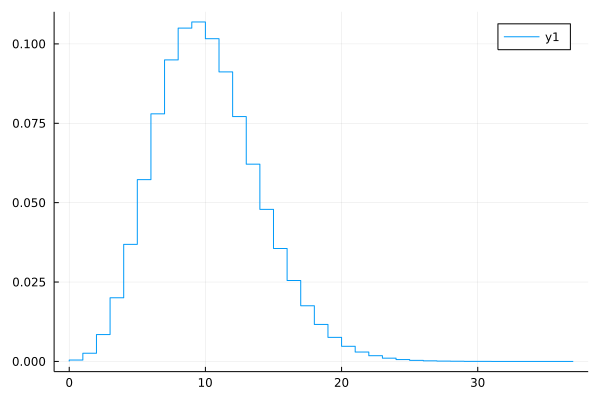

In [20]:
histogram(p, nbins=maximum(p), norm=true)

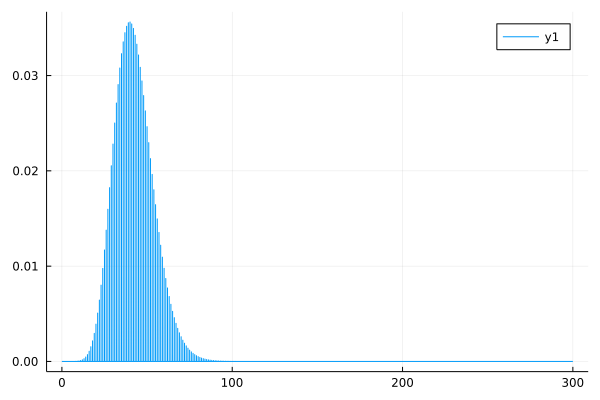

In [35]:
prot_mean = lnameans[4]
prot_var = lnacovs[4,4]
p = 1 - prot_mean/prot_var
r = prot_mean*(1-p

nb = NegativeBinomial(r,p)
xs = [0:0.01:300]
ys = pdf(nb, xs)
plot(xs,ys)

In [32]:
prot_mean

9.716538856308924

In [36]:
mean(nb)

42.36501391277366

In [37]:
prot_var

14.36986733986302

In [38]:
var(nb)

130.82670435357662